In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
def make_plot(data_frame, title, if_10 = False):
  plt.figure(figsize=(15, 5))
  dff = data_frame.rename(
      columns={'AVG_accuracy': 'Dokładność',
               'AVG_loss': 'Funkcja kosztu',
               'Column2': 'Runda',
               'Column3' : 'Mnożnik szumu'})
  # print(dff.columns)
  plt.subplot(121)
  plt.title('Dokładność dla ' + title)
  sns.lineplot(data=dff, x='Runda', y='Dokładność', hue='Mnożnik szumu', palette='dark')
  plt.subplot(122)
  plt.title('Funkcja kosztu dla ' + title)
  sns.lineplot(data=dff, x='Runda', y='Funkcja kosztu', hue='Mnożnik szumu', palette='dark')

def smaller_sampling(data_frame):
  to_delete = []
  delete = 0
  for i in range(len(data_frame)):
    if delete == 1:
      to_delete.append(i)
      delete = 0
    else:
      delete = 1
  return data_frame.drop(data_frame.index[to_delete])

def make_plot_interval(data_frame, title):
  plt.figure(figsize=(15, 5))
  dff = data_frame.rename(
      columns={'AVG_accuracy': 'Dokładność',
               'AVG_loss': 'Funkcja kosztu',
               'Column2': 'Runda',})

  plt.subplot(121)
  plt.title('Funkcja kosztu dla ' + title)
  plt.plot(dff['Runda'],dff['Funkcja kosztu'])
  plt.fill_between(dff['Runda'], (dff['Funkcja kosztu']-dff['interval_loss']), (dff['Funkcja kosztu']+dff['interval_loss']), color='b', alpha=.1)
  plt.subplot(122)
  plt.title('Dokldamodść dla ' + title)
  plt.plot(dff['Runda'],dff['Dokładność'])
  plt.fill_between(dff['Runda'], (dff['Dokładność']-dff['interval_accuracy']), (dff['Dokładność']+dff['interval_accuracy']), color='b', alpha=.1)

In [3]:
buffor = pd.read_csv('/content/drive/MyDrive/inz/eps_all_collab.csv')
buffor = smaller_sampling(buffor)

In [4]:
buffor.head()

,Column1,Column2,Column3,AVG_accuracy,AVG_loss,interval_accuracy,interval_loss
0,0,0,0.5,0.088156,2.470527,0.040139,0.294626
2,2,4,0.5,0.185413,2.259470,0.179882,0.051127
4,4,8,0.5,0.270744,2.173881,0.142034,0.077933
6,6,12,0.5,0.375882,2.065552,0.124155,0.120506
8,8,16,0.5,0.507127,1.913255,0.108085,0.161902


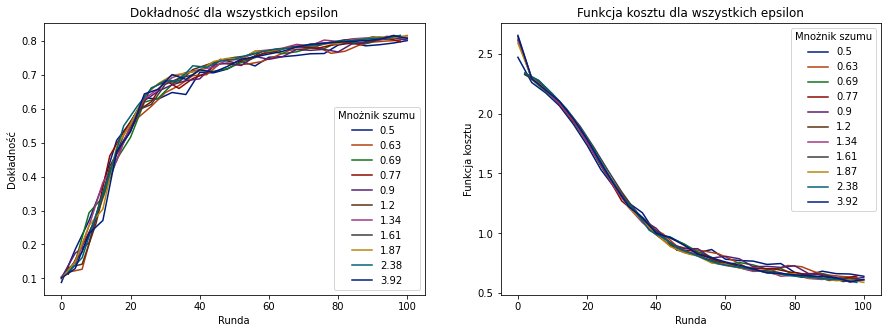

In [9]:
make_plot(buffor, "wszystkich epsilon")

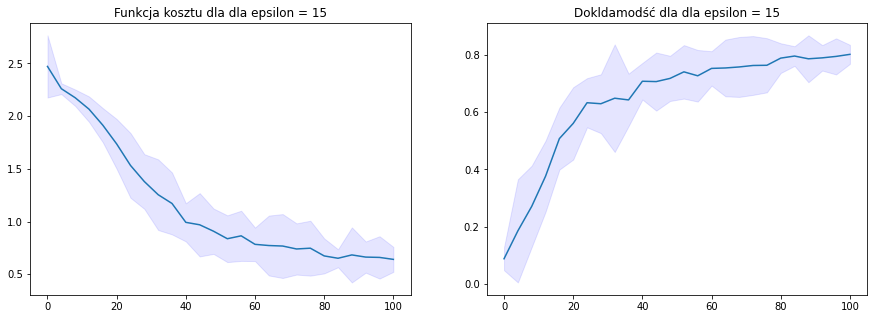

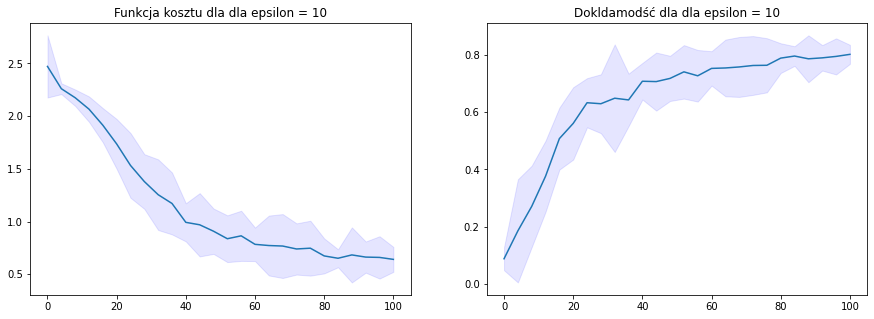

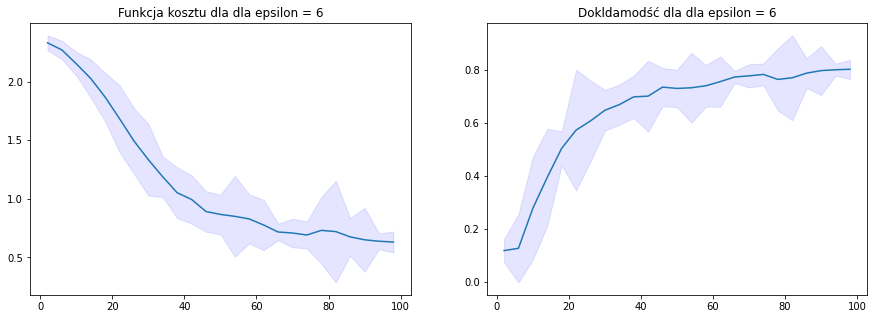

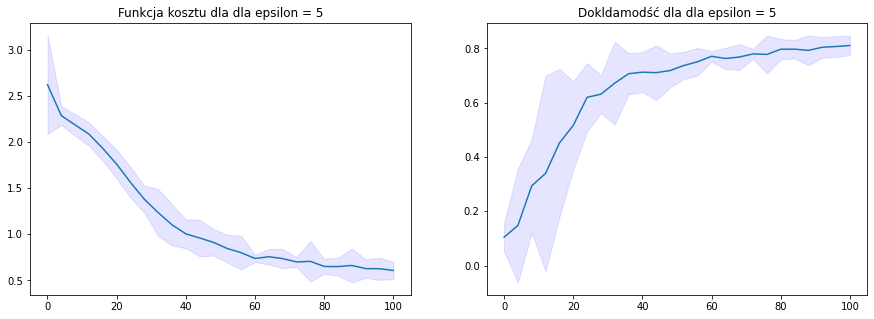

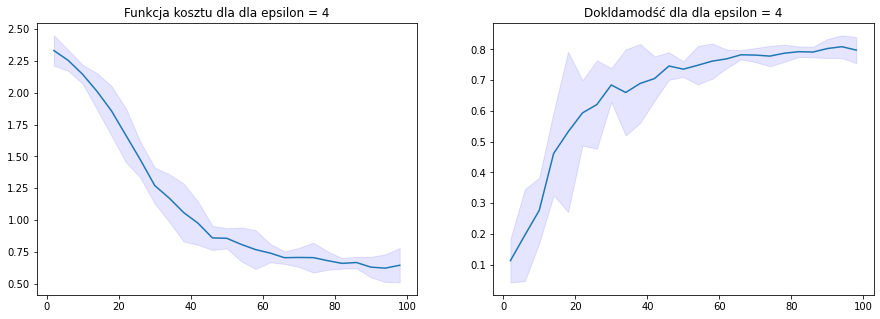

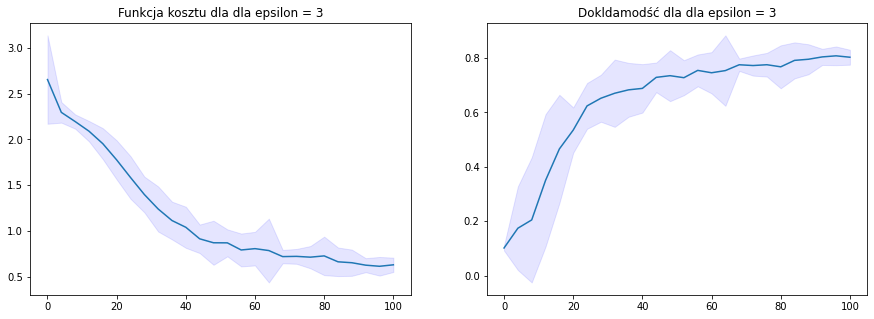

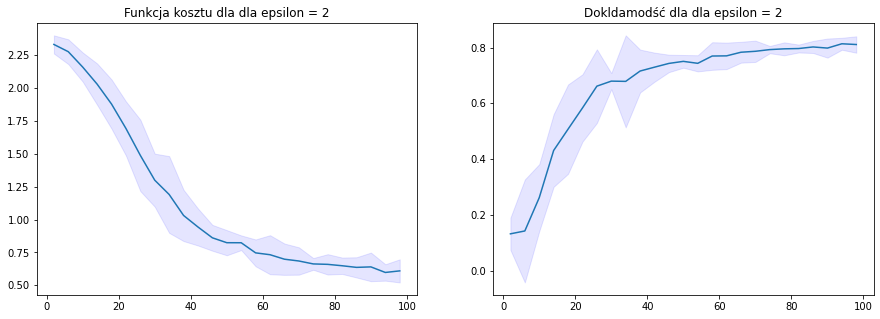

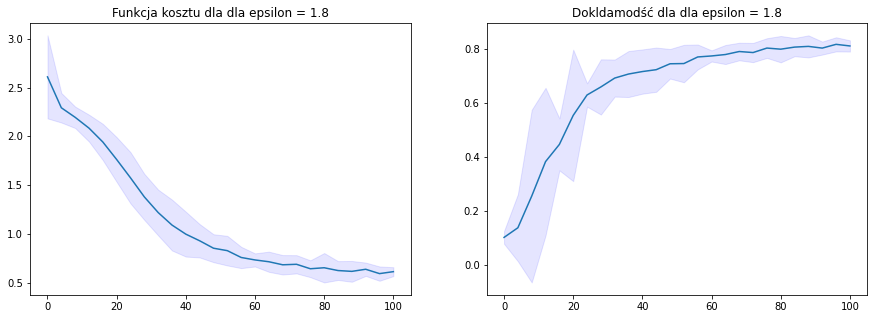

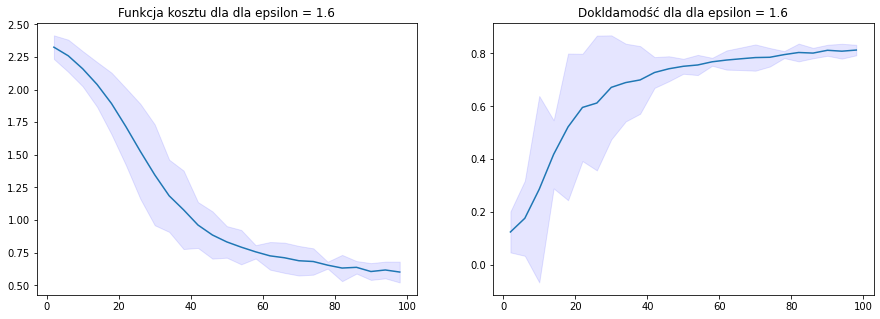

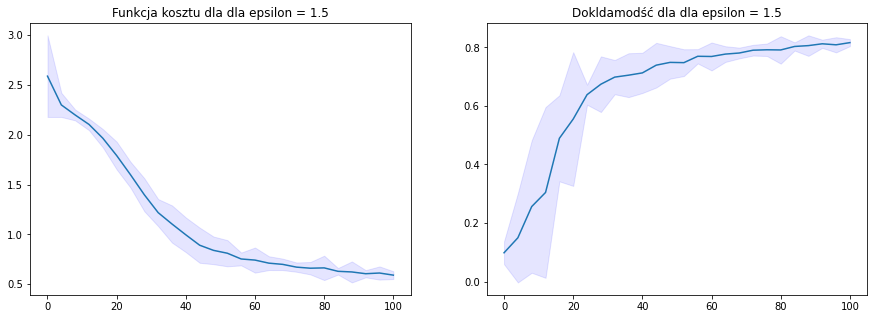

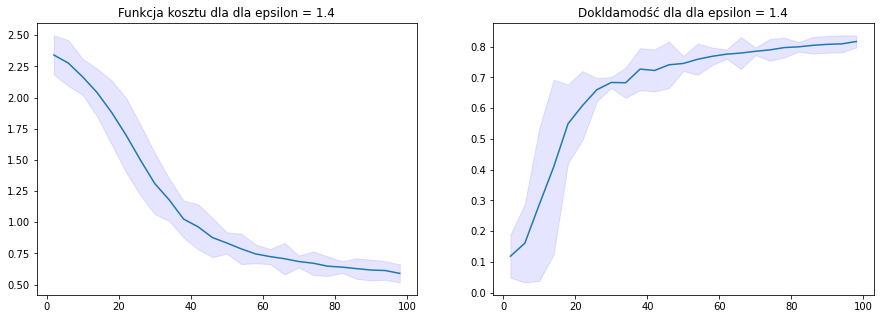

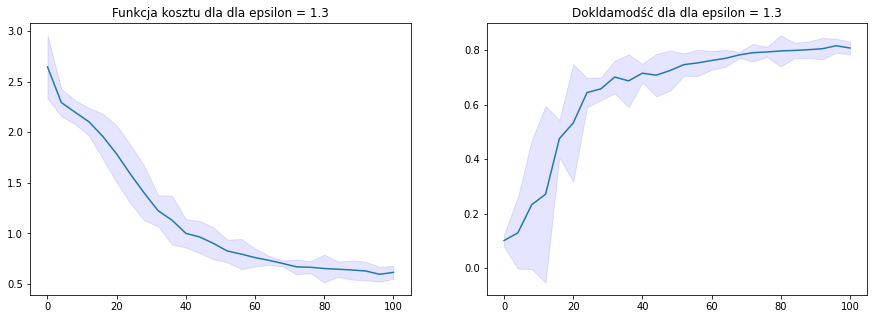

In [10]:
buffor_50 = buffor[buffor.Column3 == 0.5]
make_plot_interval(buffor_50, "dla epsilon = 15")

buffor_50 = buffor[buffor.Column3 == 0.5]
make_plot_interval(buffor_50, "dla epsilon = 10")

buffor_63 = buffor[buffor.Column3 == 0.63]
make_plot_interval(buffor_63, "dla epsilon = 6")

buffor_69 = buffor[buffor.Column3 == 0.69]
make_plot_interval(buffor_69, "dla epsilon = 5")

buffor_77 = buffor[buffor.Column3 == 0.77]
make_plot_interval(buffor_77, "dla epsilon = 4")

buffor_90 = buffor[buffor.Column3 == 0.9]
make_plot_interval(buffor_90, "dla epsilon = 3")

buffor_120 = buffor[buffor.Column3 == 1.2]
make_plot_interval(buffor_120, "dla epsilon = 2")

buffor_134 = buffor[buffor.Column3 == 1.34]
make_plot_interval(buffor_134, "dla epsilon = 1.8")

buffor_161 = buffor[buffor.Column3 == 1.61]
make_plot_interval(buffor_161, "dla epsilon = 1.6")

buffor_187 = buffor[buffor.Column3 == 1.87]
make_plot_interval(buffor_187, "dla epsilon = 1.5")

buffor_238 = buffor[buffor.Column3 == 2.38]
make_plot_interval(buffor_238, "dla epsilon = 1.4")

buffor_392 = buffor[buffor.Column3 == 3.92]
make_plot_interval(buffor_392, "dla epsilon = 1.3")

In [7]:
from tabulate import tabulate

table = [['epsilon', 'mnożnik szumu', 'ilość serwerów w rundzie', 'funkcja kosztu', 'średni poziom ufności funkcji kosztu', 'dokładność', 'średni poziom ufności dokładności'],
         [str(15), str(0.5), str(50),  str(buffor_50['AVG_loss'].min()), str(buffor_50['interval_loss'].mean()), str(buffor_50['AVG_accuracy'].max()), str(buffor_50['interval_accuracy'].mean())],
         [str(10), str(0.5), str(50),  str(buffor_50['AVG_loss'].min()), str(buffor_50['interval_loss'].mean()), str(buffor_50['AVG_accuracy'].max()), str(buffor_50['interval_accuracy'].mean())],
         [str(6), str(0.63), str(63),  str(buffor_63['AVG_loss'].min()), str(buffor_63['interval_loss'].mean()), str(buffor_63['AVG_accuracy'].max()), str(buffor_63['interval_accuracy'].mean())],
         [str(5), str(0.69), str(69),  str(buffor_69['AVG_loss'].min()), str(buffor_69['interval_loss'].mean()), str(buffor_69['AVG_accuracy'].max()), str(buffor_69['interval_accuracy'].mean())],
         [str(4), str(0.77), str(77),  str(buffor_77['AVG_loss'].min()), str(buffor_77['interval_loss'].mean()), str(buffor_77['AVG_accuracy'].max()), str(buffor_77['interval_accuracy'].mean())],
         [str(3), str(0.9), str(90),  str(buffor_90['AVG_loss'].min()), str(buffor_90['interval_loss'].mean()), str(buffor_90['AVG_accuracy'].max()), str(buffor_90['interval_accuracy'].mean())],
         [str(2), str(1.2), str(120),  str(buffor_120['AVG_loss'].min()), str(buffor_120['interval_loss'].mean()), str(buffor_120['AVG_accuracy'].max()), str(buffor_120['interval_accuracy'].mean())],
         [str(1.8), str(1.34), str(134),  str(buffor_134['AVG_loss'].min()), str(buffor_134['interval_loss'].mean()), str(buffor_134['AVG_accuracy'].max()), str(buffor_134['interval_accuracy'].mean())],
         [str(1.6), str(1.61), str(161),  str(buffor_161['AVG_loss'].min()), str(buffor_161['interval_loss'].mean()), str(buffor_161['AVG_accuracy'].max()), str(buffor_161['interval_accuracy'].mean())],
         [str(1.5), str(1.87), str(187),  str(buffor_187['AVG_loss'].min()), str(buffor_187['interval_loss'].mean()), str(buffor_187['AVG_accuracy'].max()), str(buffor_187['interval_accuracy'].mean())],
         [str(1.4), str(2.38), str(238),  str(buffor_238['AVG_loss'].min()), str(buffor_238['interval_loss'].mean()), str(buffor_238['AVG_accuracy'].max()), str(buffor_238['interval_accuracy'].mean())],
         [str(1.3), str(3.92), str(392),  str(buffor_392['AVG_loss'].min()), str(buffor_392['interval_loss'].mean()), str(buffor_392['AVG_accuracy'].max()), str(buffor_392['interval_accuracy'].mean())]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════╤═════════════════╤════════════════════════════╤══════════════════╤════════════════════════════════════════╤══════════════╤═════════════════════════════════════╕
│   epsilon │   mnożnik szumu │   ilość serwerów w rundzie │   funkcja kosztu │   średni poziom ufności funkcji kosztu │   dokładność │   średni poziom ufności dokładności │
╞═══════════╪═════════════════╪════════════════════════════╪══════════════════╪════════════════════════════════════════╪══════════════╪═════════════════════════════════════╡
│      15   │            0.5  │                         50 │         0.641294 │                               0.212291 │     0.800926 │                           0.0916733 │
├───────────┼─────────────────┼────────────────────────────┼──────────────────┼────────────────────────────────────────┼──────────────┼─────────────────────────────────────┤
│      10   │            0.5  │                         50 │         0.641294 │                               0.212291 │     0.800